In [10]:
include("MDPModelFunctions.jl")
using StatsBase
using PythonPlot

In [11]:

N_Objects = 8
N_Quanta = 12

# S = generate_all_states(N_Quanta,N_Objects)

# 50,000 states...

12

#### Simulate Delayed Memory Paradigm

In [16]:

N_Objects = 6

Quanta_Vals = [3, 6, 12]
NQ = length(Quanta_Vals)
eps_vals = [.1, .5, .9]
NE = length(eps_vals)

N_TimeSteps = 250

prob_remember_object_eps_quant = zeros(N_TimeSteps, NQ, NE)

for eps_idx in 1:NE
    
    print(string("Epsilon: ", eps_vals[eps_idx]))
    
    for q_idx in 1:NQ
        
        print(string("Num. Quanta: : ", Quanta_Vals[q_idx]))
                
        N_Quanta = Quanta_Vals[q_idx]
        epsilon = eps_vals[eps_idx]
        
        prob_remember_object = simulate_delayed_memory(N_Quanta, N_Objects, epsilon, N_TimeSteps)

        prob_remember_object_eps_quant[:,q_idx, eps_idx] = prob_remember_object[:,2]
    end
end


Epsilon: 0.1Num. Quanta: : 3Generating All States
Computing Optimal Policy
Simulating Episode
Num. Quanta: : 6Generating All States
Computing Optimal Policy
Simulating Episode
Num. Quanta: : 12Generating All States
Computing Optimal Policy
Simulating Episode


LoadError: InterruptException:

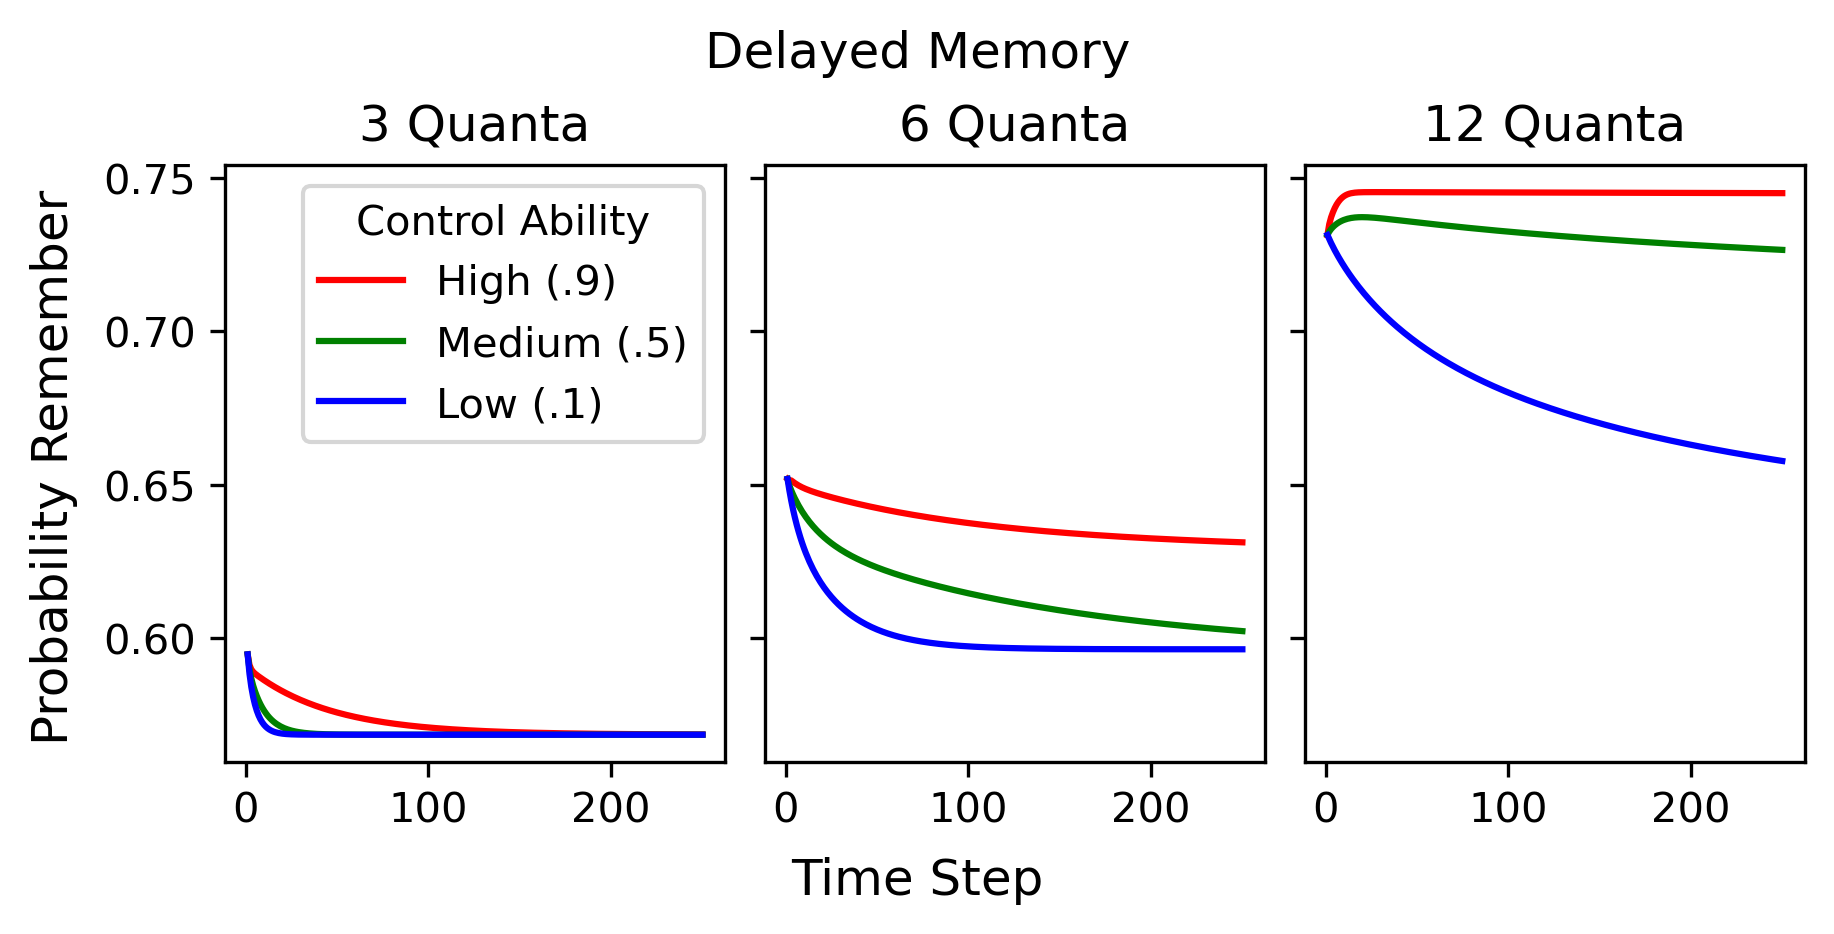

Python: None

In [15]:
colors = ["r", "g", "b"]


eps_label = ["High (.9)", "Medium (.5)", "Low (.1)"]

fig,ax = subplots(1, NQ, figsize=(6,3), dpi=300, constrained_layout=true, sharey=true, sharex = true)

for q_idx in 1:NQ
    for eps_idx in 1:NE
        ax[q_idx-1].plot(1:N_TimeSteps, prob_remember_object_eps_quant[:,q_idx,eps_idx], label = eps_label[eps_idx], c = colors[eps_idx])
    end
    # ax[q_idx-1].set_xlabel("Time Step")
    ax[q_idx-1].set_title(string(Quanta_Vals[q_idx], " Quanta"))

end

ax[0].legend(title = "Control Ability")
fig.suptitle("Delayed Memory")
# ax[0].set_ylim(.55,.85)

fig.supxlabel("Time Step")
fig.supylabel("Probability Remember")

savefig("DelayedMemory.png")

In [5]:

N_Objects = 3
Quanta_Vals = [3, 6, 12]
NQ = length(Quanta_Vals)
eps_vals = [.1, .5, .9]
NE = length(eps_vals)

N_TimeSteps_Pre = 100
N_TimeSteps_Post = 100
N_TimeSteps = N_TimeSteps_Pre + N_TimeSteps_Post

prob_remember_object_cued_eps_quant = zeros(N_TimeSteps, NQ, NE)
prob_remember_object_uncued_eps_quant = zeros(N_TimeSteps, NQ, NE)

for eps_idx in 1:NE
    
    print(string("Epsilon: ", eps_vals[eps_idx]))
    
    for q_idx in 1:NQ
                
        N_Quanta = Quanta_Vals[q_idx]
        epsilon = eps_vals[eps_idx]
        
        prob_remember_object_cued, prob_remember_object_uncued = simulate_retrocue(N_Quanta, N_Objects, epsilon, N_TimeSteps_Pre, N_TimeSteps_Post)

        prob_remember_object_cued_eps_quant[:,q_idx, eps_idx] = prob_remember_object_cued
        prob_remember_object_uncued_eps_quant[:,q_idx, eps_idx] = prob_remember_object_uncued
    end
end


Epsilon: 0.1Epsilon: 0.5Epsilon: 0.9

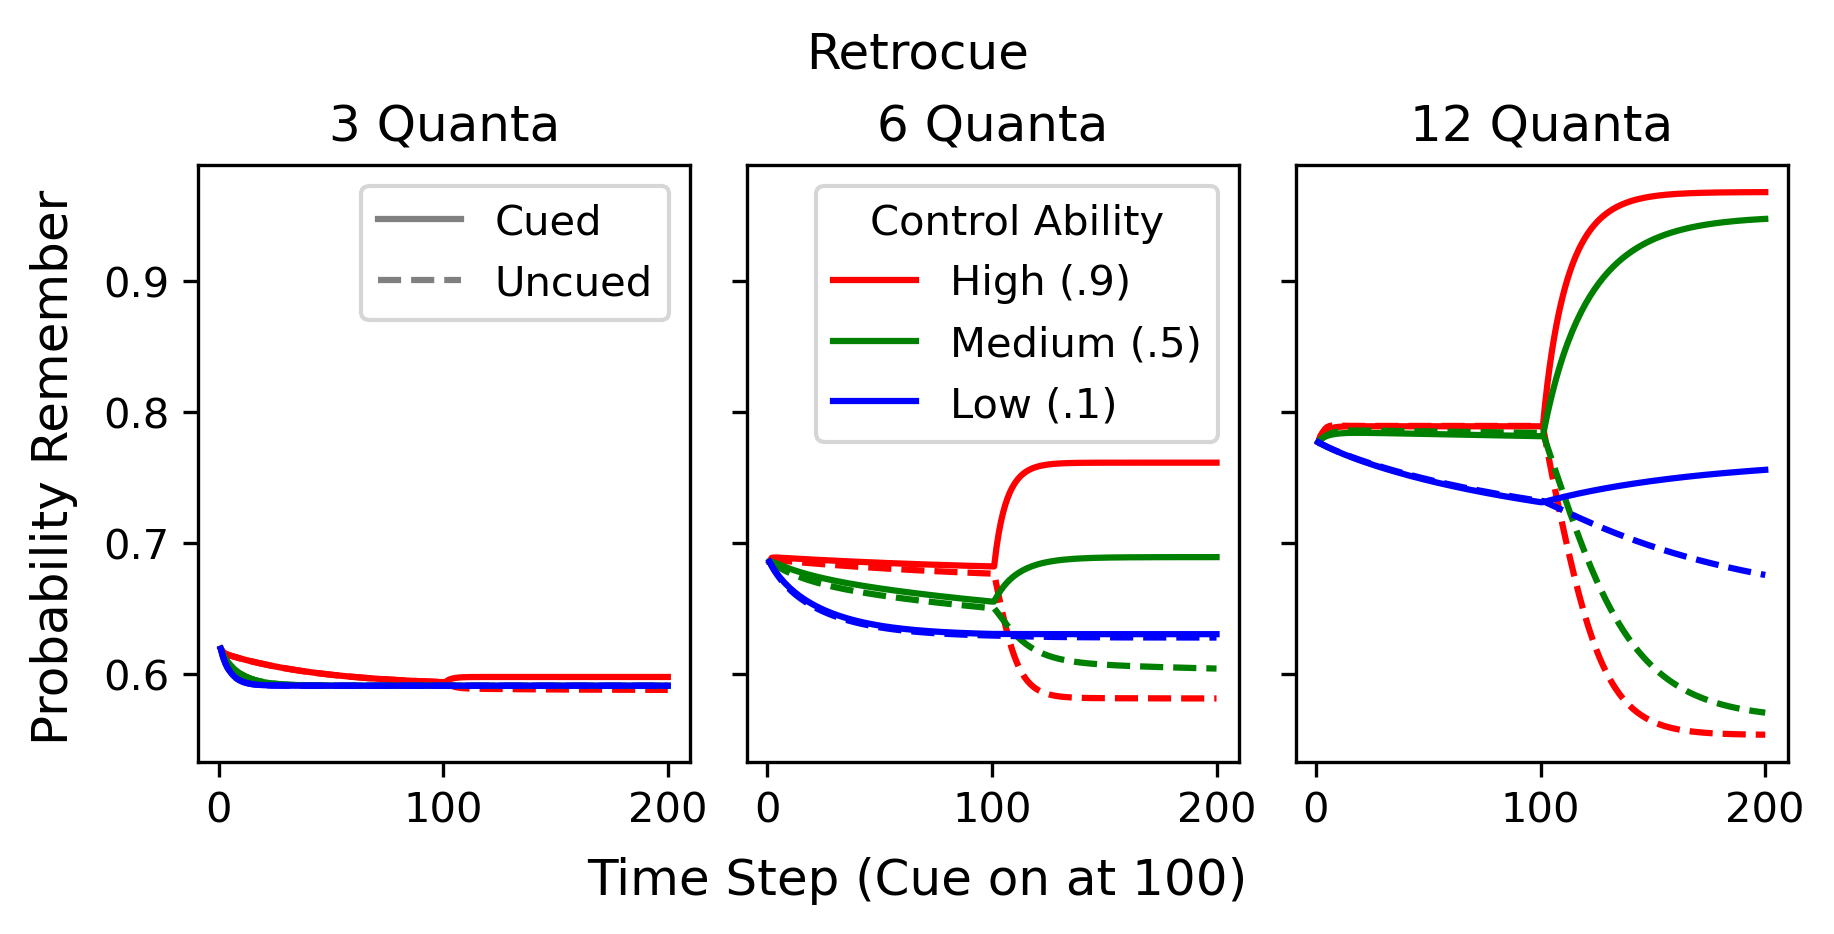

Python: None

In [6]:
colors = ["r", "g", "b"]

eps_label = ["High (.9)", "Medium (.5)", "Low (.1)"]

fig,ax = subplots(1, NQ, figsize=(6,3), dpi=300, constrained_layout=true, sharey=true, sharex = true)

for q_idx in 1:NQ
    for eps_idx in 1:NE
        ax[q_idx-1].plot(1:N_TimeSteps, prob_remember_object_cued_eps_quant[:,q_idx,eps_idx], label = eps_label[eps_idx], color = colors[eps_idx])
        ax[q_idx-1].plot(1:N_TimeSteps, prob_remember_object_uncued_eps_quant[:,q_idx,eps_idx], ls = "--", colors[eps_idx])

    end
    # ax[q_idx-1].set_xlabel("Time Step")
    ax[q_idx-1].set_title(string(Quanta_Vals[q_idx], " Quanta"))
    # ax[q_idx-1].axvline(N_TimeSteps_Pre, ymin = .1, ymax = .9, alpha = .5, color = "k", lw = 1)

end

dummy_lines = [ax[0].plot([],[], c="gray")[0], ax[0].plot([],[], c="gray", ls = "--")[0]]

# ax[0].set_ylabel("Probability Remember")
ax[1].legend(title = "Control Ability", loc=1)
ax[0].legend([dummy_lines[1],dummy_lines[2]], ["Cued", "Uncued"])

fig.suptitle("Retrocue")
fig.supxlabel("Time Step (Cue on at 100)")
fig.supylabel("Probability Remember")

# ax[0].set_ylim(.55,.85)
savefig("RetroCue.png")